Preparation of Data: See example on how to export at the end of notebook 'sfari_brain'.

Similarly prepared with the same script for Kidney and Lung.

For the three Random degree files, see end of 'repeated_random' notebook

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns

In [15]:
kidney = np.loadtxt("kidney-degrees.txt")
lung = np.loadtxt("lung-degrees.txt")
brain = np.loadtxt("brain-degrees.txt")

kidney_r = np.loadtxt("kidney-random-degrees.txt")
lung_r = np.loadtxt("lung-random-degrees.txt")
brain_r = np.loadtxt("brain-random-degrees.txt")

print(len(kidney))
print(len(lung))
print(len(brain))

print(len(kidney_r))
print(len(lung_r))
print(len(brain_r))

720
688
745
7450
7450
7425


In [16]:
toplot = [kidney_r, lung_r, brain_r, kidney, lung, brain]
df_kid_r = pd.DataFrame({"Node strength": kidney_r, "Tissue": "kidney\n(random)", "t": "kidney"})
df_lun_r = pd.DataFrame({"Node strength": lung_r, "Tissue": "lung\n(random)", "t": "lung"})
df_bra_r = pd.DataFrame({"Node strength": brain_r, "Tissue": "brain\n(random)", "t": "brain"})

df_kid = pd.DataFrame({"Node strength": kidney, "Tissue": "kidney", "t": "kidney"})
df_lun = pd.DataFrame({"Node strength": lung, "Tissue": "lung", "t": "lung"})
df_bra = pd.DataFrame({"Node strength": brain, "Tissue": "brain", "t": "brain"})

df_con = pd.concat([df_bra_r,
                    df_kid_r, 
                    df_lun_r, 
                    df_bra,
                    df_kid,
                    df_lun])

to_y = pd.array(['kidney\n(random)',  
           'lung\n(random)',
           'brain\n(random)',
           'kidney', 'lung', 'brain'])

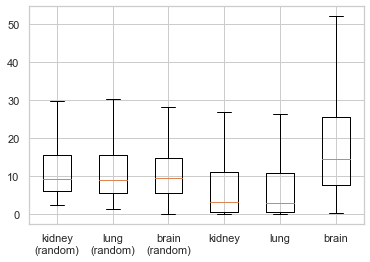

In [17]:
plt.boxplot(toplot, showfliers=False)
plt.xticks([1, 2, 3, 4, 5, 6], ['kidney\n(random)', 
                                'lung\n(random)', 
                                'brain\n(random)', 
                                'kidney', 'lung', 'brain'])
plt.show()

In [18]:
sns.set_theme(style="whitegrid")

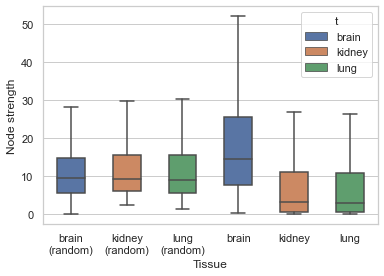

In [19]:
ax = sns.boxplot(data=df_con, y="Node strength", x="Tissue", hue= "t", showfliers=False, dodge=False, width=0.5)

In [20]:
stat, p = mannwhitneyu(lung, brain)
print(stat)
print(p)

109452.0
7.89956956645722e-79


In [21]:
stat, p = mannwhitneyu(kidney, brain)
print(stat)
print(p)

116688.5
1.8179205091875527e-78


In [22]:
stat, p = mannwhitneyu(lung, lung_r)
print(stat)
print(p)

1390445.0
2.830319916133261e-88


In [23]:
stat, p = mannwhitneyu(kidney, kidney_r)
print(stat)
print(p)

1426697.0
3.961091182523044e-96


In [24]:
stat, p = mannwhitneyu(lung_r, kidney_r)
print(stat)
print(p)

26660583.5
1.630021414942967e-05


In [25]:
stat, p = mannwhitneyu(kidney, lung)
print(stat)
print(p)

235901.5
0.06125118366475865
